In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

# Checkout how updated DAS treats AIAN alone on reservations

In [2]:
## this is data from vintage 20200527, the demo product for the updated DAS
## https://www.nhgis.org/privacy-protected-demonstration-data

jun20_path = '/ihme/scratch/users/beatrixh/demonstration_products_2020/nhgis_ppdd_20200527_aianhh_144.csv'
jun20_dt = pd.read_csv(jun20_path)

# sum over AIANHH areas
jun20_dt = jun20_dt.groupby('name').sum()

In [3]:
## this is data from the oct 2019 release of the 2010 census with DAS, combined with the 2010 census
## https://ciser.cornell.edu/data/data-archive/census-2010-sf1-download-center/
## https://ciser.cornell.edu/data/data-archive/census-2010-dhc-download-center/

oct19_path = '/ihme/scratch/users/beatrixh/ciser/demonstration_2010/aianhh/census_2010_aianhh_areas_aian_pop.csv'
oct19_dt = pd.read_csv(oct19_path)

/share/code/abie/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
oct19_dt = oct19_dt.groupby(['AIANHH'])['P0030004_SF','P0030004_DP',
                                  'P0060004_SF','P0060004_DP',
                                  'P0010001_SF','P0010001_DP'].apply(lambda x : x.astype(int).sum())

In [5]:
## verify that oct19_dt.P0030004_SF == jun20_dt.H7X004_sf

a = oct19_dt.P0030004_SF.sort_values() #this is the non-DAS counts
b = jun20_dt.H7X004_sf.sort_values() #this should also be the non-DAS counts

In [6]:
# do these vectors have the same histogram?
check_same = a.value_counts().reset_index().merge(b.value_counts().reset_index())
check_same[check_same.P0030004_SF!=check_same.H7X004_sf].shape[0]

0

In [7]:
# prep oto merge
oct19_dt = oct19_dt.sort_values(by = 'P0030004_SF').reset_index() 
jun20_dt = jun20_dt.sort_values(by = 'H7X004_sf').reset_index() 

# create a key
jun20_dt['AIANHH'] = oct19_dt.AIANHH

In [8]:
# merge
df = jun20_dt[['AIANHH','state','name',
               'H7X004_sf','H7X004_dp']].merge(oct19_dt[['AIANHH','P0030004_SF','P0030004_DP']])

In [9]:
# does the baseline match up for all rows?
df[df.H7X004_sf!=df.P0030004_SF].shape[0]

0

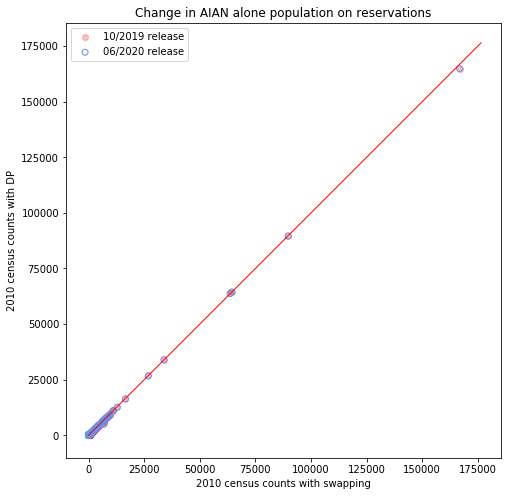

In [21]:
# compare sf --> dp change

x0 = df.P0030004_SF
y0 = df.P0030004_DP

x = df.H7X004_sf
y = df.H7X004_dp

fig = plt.figure() 
fig.set_size_inches(8,8)

ax = fig.add_subplot(111)
ax.scatter(x0, y0, facecolors='red', edgecolors = 'red', alpha = 0.25, label = '10/2019 release')
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue', label = '06/2020 release')
ax.set_aspect('equal', adjustable='box')

xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
lim = max(xright,ytop)
ax.plot([-1,lim],[-1,lim], 'red', linewidth=1)

plt.xlabel('2010 census counts with swapping')
plt.ylabel('2010 census counts with DP')
plt.title('Change in AIAN alone population on reservations')

plt.legend()
plt.show()

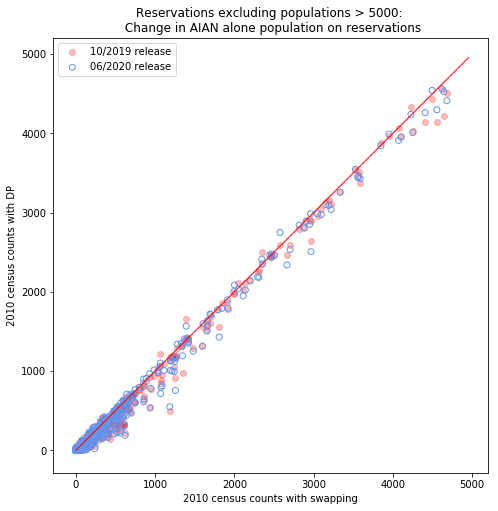

In [23]:
# zoom in

x0 = df[(df.P0030004_SF<5e3)].P0030004_SF
y0 = df[(df.P0030004_SF<5e3)].P0030004_DP

x = df[(df.H7X004_sf<5e3)].H7X004_sf
y = df[(df.H7X004_sf<5e3)].H7X004_dp

fig = plt.figure() 
fig.set_size_inches(8,8)

ax = fig.add_subplot(111)
ax.scatter(x0, y0, facecolors='red', edgecolors = 'red', alpha = 0.25, label = '10/2019 release')
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue', label = '06/2020 release')
ax.set_aspect('equal', adjustable='box')

xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
lim = max(xright,ytop)
ax.plot([-1,lim],[-1,lim], 'red', linewidth=1)

plt.xlabel('2010 census counts with swapping')
plt.ylabel('2010 census counts with DP')
plt.title('Reservations excluding populations > 5000: \n Change in AIAN alone population on reservations')

plt.legend()
plt.show()

In [24]:
x0 = df[(df.P0030004_SF<5e3)].P0030004_SF
y0 = df[(df.P0030004_SF<5e3)].P0030004_DP

x = df[(df.H7X004_sf<5e3)].H7X004_sf
y = df[(df.H7X004_sf<5e3)].H7X004_dp

(x0-y0).sum(), (x-y).sum()

(26770, 29786)

In [25]:
x0 = df.P0030004_SF  # older version
y0 = df.P0030004_DP

x = df.H7X004_sf  # newer version
y = df.H7X004_dp

(x0-y0).sum(), (x-y).sum()

(33317, 38277)

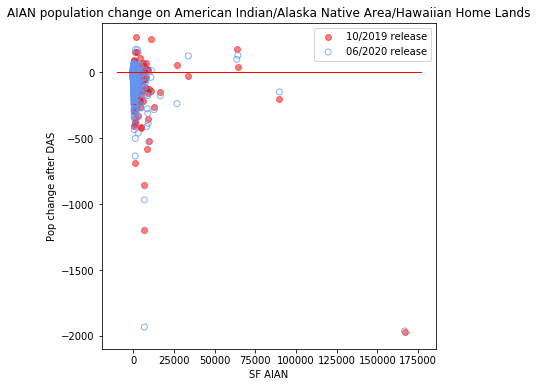

In [12]:
x = df.H7X004_sf
y1 = df.P0030004_DP - df.H7X004_sf
y2 = df.H7X004_dp - df.H7X004_sf


fig = plt.figure() 
fig.set_size_inches(6,6)

ax = fig.add_subplot(111)
ax.scatter(x, y1, facecolors='red', edgecolors = 'red', alpha = 0.5, label = '10/2019 release')
ax.scatter(x, y2, facecolors='none', edgecolors = 'cornflowerblue', alpha= 0.75, label = '06/2020 release')
# ax.set_aspect('equal', adjustable='box')

xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
lim = max(xright,ytop)
ax.plot([xleft,xright],[0,0], 'red', linewidth=1)

plt.xlabel('SF AIAN')
plt.ylabel('Pop change after DAS')
plt.title('AIAN population change on American Indian/Alaska Native Area/Hawaiian Home Lands')
plt.legend()

plt.show()

In [13]:
# define var to look at change in how DAS old/new adjusts each point
df['dif'] = df.H7X004_dp - df.P0030004_DP

In [14]:
df.dif.describe()

count    692.000000
mean      -7.167630
std       61.650461
min     -737.000000
25%      -26.000000
50%        0.000000
75%       12.000000
max      305.000000
Name: dif, dtype: float64

In [16]:
df.H7X004_dp.sum(), df.P0030004_DP.sum(), df.dif.sum()

(928907, 933867, -4960)

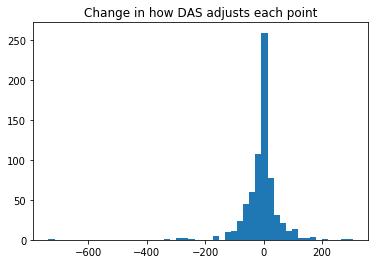

In [17]:
plt.hist(df.dif, bins = 50)
plt.title('Change in how DAS adjusts each point')
plt.show()

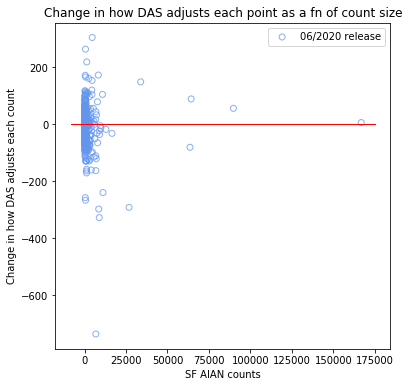

In [18]:
x = df.H7X004_sf
y = df.dif

fig = plt.figure() 
fig.set_size_inches(6,6)

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue', alpha= 0.75, label = '06/2020 release')
# ax.set_aspect('equal', adjustable='box')

xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
lim = max(xright,ytop)
ax.plot([xleft,xright],[0,0], 'red', linewidth=1)

plt.xlabel('SF AIAN counts')
plt.ylabel('Change in how DAS adjusts each count')
plt.title('Change in how DAS adjusts each point as a fn of count size')
plt.legend()

plt.show()